In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve

In [2]:
error=0.001
lower=500
upper=900
Num=305
num=305
tt='reflect'
val=3
typ='thin_plate'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
number=['0000','0100','0250','0500']
label=['A','B','C']
total=[alanum,albnum,numbers,numbers,numbers,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
xzs=[0.135]
for x in xzs:
    yt=[]
    ytn=[]
    for k in ['AL','SiO2','SiC']:
        for i in label:
                ys=[]
                yns=[]
                xs=[]
                for j in number:
                    try:
                        df=pd.read_table('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                        #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                        df.columns=['energyloss','intensity']
                        E=df['energyloss'][lower:upper]
                        I=df['intensity'][lower:upper]
                        df.set_index('energyloss',inplace=True)
                        for column in df.index:
                            if column>x-error and column<x+error:
                                y=df.loc[column].values[0]
                                #print(y)
                                ys.append(y)
                                yns.append(y)
                                break
                    except Exception as e:
                        #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                        yns.append(np.nan)
                        pass
                yt.append(ys)
                ytn.append(yns)
    dfys['EEL_Compoent_{}_Line_{}'.format(x,i)]=yt
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df3 = pd.DataFrame.from_dict(dfys, orient='index')
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
df3.to_csv('EELxx_{}.csv'.format(x))
a,b=df3.shape
df2.to_csv('EELxx_{}.csv'.format(x))
stelement=['AlA','AlB','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}

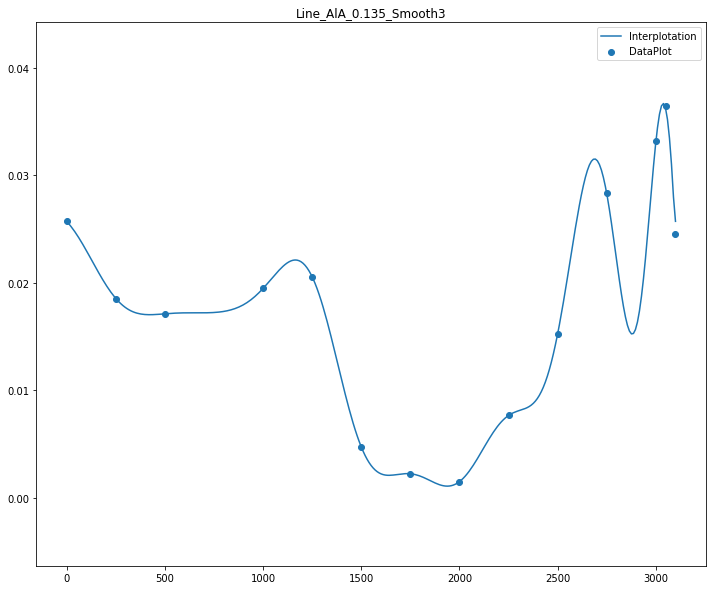

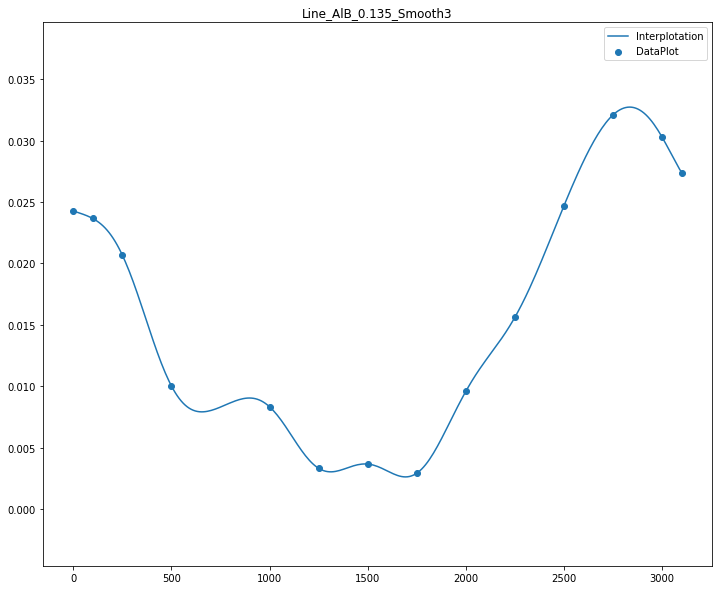

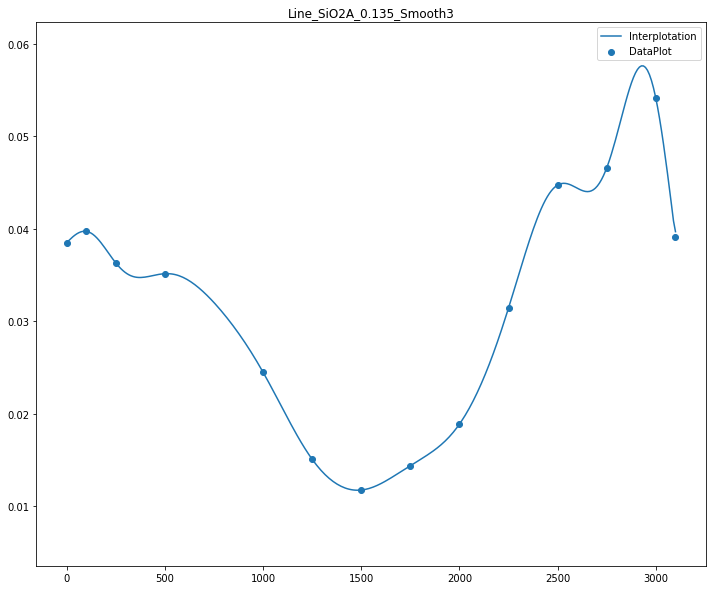

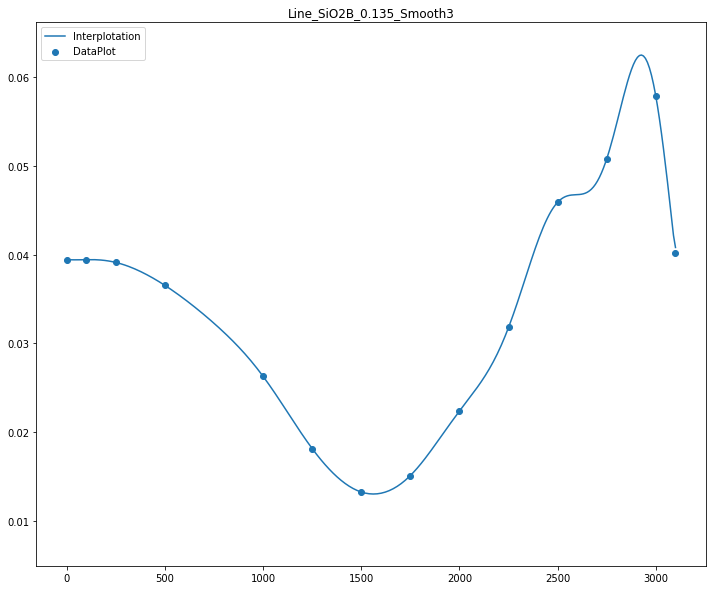

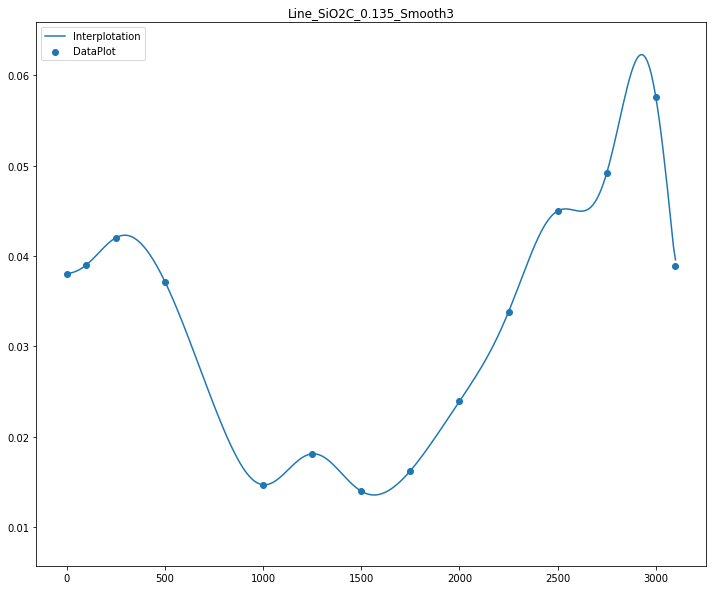

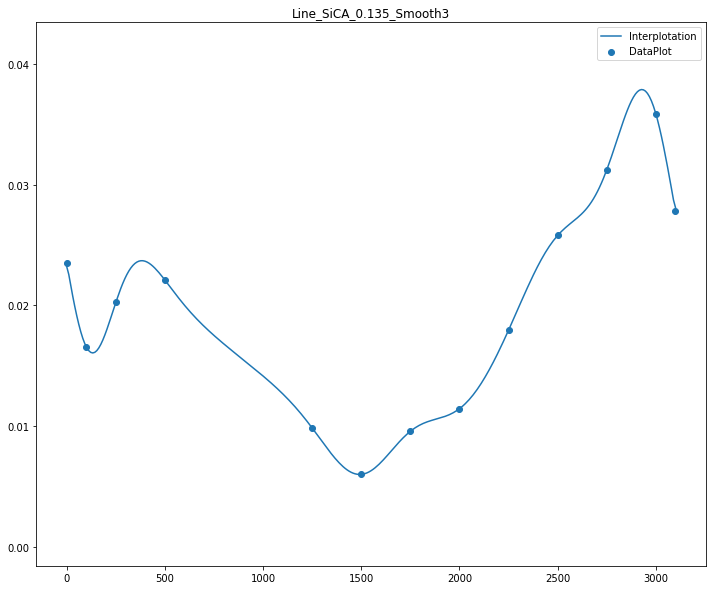

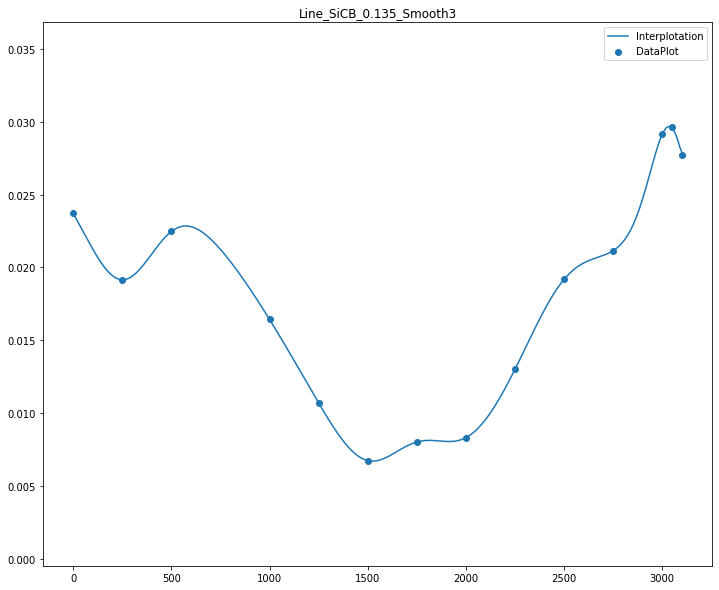

In [3]:
a,b=df3.shape
for row in range(0,a):
    co=0
    y=df3.iloc[row].values
    for value in y:
        if len(value)!=0:
            fig= plt.figure(figsize=(12,10))
            axes=fig.add_subplot(1,1,1)
            mean=np.full(val,1/val)
            pos=total[co]
            co=co+1
            f = Rbf(pos,value,kind=typ)
            xnew=np.linspace(0,3100,num)
            plt.scatter(pos,value),plt.plot(xnew,convolve(f(xnew),mean,mode=tt))
            plt.legend(['Interplotation','DataPlot'])
            plt.title('Line_{}_{}_Smooth{}'.format(stelement[z],xzs[row],val))
            plt.savefig('Line_{}_{}_S{}.png'.format(stelement[z],xzs[row],val))
            #display(xzs[row],stelement[z])
            '''RGB=[]
            xi=max(f(xnew))
            xa=min(f(xnew))
            for number in f(xnew):
                value=(xa-number)/(xa-xi)
                RGB.append([value*255,0,0])
            whole2['EEL={}_line_{}'.format(xzs[row],stelement[z])]=RGB'''
            nosiy=convolve(f(xnew),mean,mode=tt)
            whole['EEL={}_line_{}'.format(xzs[row],stelement[z])]=value
            whole1['EEL={}_line_{}'.format(xzs[row],stelement[z])]=nosiy
            z+=1
            if z==len(stelement):
                z=0
finaldf =pd.DataFrame.from_dict(whole, orient='index')
#display(finaldf,whole)
finaldf1 =pd.DataFrame.from_dict(whole1, orient='index')
finaldf1.to_csv('First.csv')
finaldf2=DataFrame(whole2)
#finaldf1.to_csv('S{}.csv'.format(val))

In [11]:
z=finaldf1
a,b=z.shape
New={}
for i in range(1,a+1):
    x=z.iloc[i-1:i].values[0]
    #print(x)
    xa=max(x)
    xi=min(x)
    total=[]
    for j in x:
        total.append([(j-xi)/(xa-xi)*255,0,0])
    #print(total)
    New['{}'.format(i)]=total
#display(New)
df1=DataFrame(New)
df=df1.transpose()
display(df)
df.to_csv('FirstRGBS3.csv')
Z=df.values.tolist()
im = np.array(Z, dtype=np.uint8)
plt.axis('off')
plt.imshow(im)
plt.savefig('FirstExpanS3.png',bbox_inches='tight',dpi=800)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1,"[175.91726771290766, 0, 0]","[174.85371228105257, 0, 0]","[173.192970192593, 0, 0]","[171.40397092882452, 0, 0]","[169.4943690755254, 0, 0]","[167.47323336773061, 0, 0]","[165.35093465534374, 0, 0]","[163.13900916071495, 0, 0]","[160.8500039943151, 0, 0]","[158.49731141729373, 0, 0]",...,"[237.1447973935056, 0, 0]","[246.80021271403334, 0, 0]","[252.9569597172101, 0, 0]","[255.0, 0, 0]","[252.45417840162432, 0, 0]","[245.0111739611466, 0, 0]","[232.54490711743105, 0, 0]","[215.1140296228104, 0, 0]","[192.9516088283499, 0, 0]","[176.62621125050666, 0, 0]"
2,"[183.28901073261284, 0, 0]","[182.97338710788736, 0, 0]","[182.50100217559927, 0, 0]","[182.02799512451716, 0, 0]","[181.54621468942463, 0, 0]","[181.04663390803012, 0, 0]","[180.519422920567, 0, 0]","[179.9540380389137, 0, 0]","[179.3393239858788, 0, 0]","[178.66362665912567, 0, 0]",...,"[232.54610780875177, 0, 0]","[230.01241601327746, 0, 0]","[227.4204201674418, 0, 0]","[224.7910035563875, 0, 0]","[222.145942744955, 0, 0]","[219.50739641093043, 0, 0]","[216.89735848187357, 0, 0]","[214.3371073688736, 0, 0]","[211.84668368323702, 0, 0]","[210.21192126444902, 0, 0]"
3,"[149.19143320925102, 0, 0]","[150.00391815488643, 0, 0]","[151.18372675409526, 0, 0]","[152.27661513463187, 0, 0]","[153.25565790691607, 0, 0]","[154.0945628440439, 0, 0]","[154.76868967244823, 0, 0]","[155.25607974319325, 0, 0]","[155.53843442706506, 0, 0]","[155.60198027971362, 0, 0]",...,"[231.43044706653436, 0, 0]","[224.6065032975707, 0, 0]","[217.0622296293218, 0, 0]","[208.8824552784488, 0, 0]","[200.16247916191955, 0, 0]","[191.00511424607416, 0, 0]","[181.51747535857393, 0, 0]","[171.80769370738466, 0, 0]","[161.98174381258082, 0, 0]","[155.40427156376, 0, 0]"
4,"[136.08158410508221, 0, 0]","[136.06166988294183, 0, 0]","[136.0397961750356, 0, 0]","[136.0330209629781, 0, 0]","[136.0386725402654, 0, 0]","[136.05385312621922, 0, 0]","[136.07550188915607, 0, 0]","[136.100462756602, 0, 0]","[136.12555315536142, 0, 0]","[136.1476299209855, 0, 0]",...,"[226.48232420746774, 0, 0]","[218.86326893896404, 0, 0]","[210.5032782099791, 0, 0]","[201.4924454115872, 0, 0]","[191.93155394355006, 0, 0]","[181.92899807210654, 0, 0]","[171.59743820314884, 0, 0]","[161.05038158038772, 0, 0]","[150.39888202787677, 0, 0]","[143.27552041663793, 0, 0]"
5,"[128.1986925423968, 0, 0]","[128.33090855231558, 0, 0]","[128.56861801427638, 0, 0]","[128.88675945550446, 0, 0]","[129.29021903431226, 0, 0]","[129.7829560798986, 0, 0]","[130.3677081097129, 0, 0]","[131.04570377737878, 0, 0]","[131.81640154352903, 0, 0]","[132.67727202668436, 0, 0]",...,"[225.52960141991318, 0, 0]","[217.41377219728474, 0, 0]","[208.48482725691434, 0, 0]","[198.8401382768506, 0, 0]","[188.5887464680489, 0, 0]","[177.84802290651604, 0, 0]","[166.74003987345034, 0, 0]","[155.3878604117601, 0, 0]","[143.9119561298486, 0, 0]","[136.2336201893565, 0, 0]"
6,"[137.57407268051247, 0, 0]","[132.43683188722372, 0, 0]","[124.88722403295671, 0, 0]","[117.6798926460061, 0, 0]","[110.903215122661, 0, 0]","[104.6432581356461, 0, 0]","[98.98087184480657, 0, 0]","[93.98878047318065, 0, 0]","[89.7288297408029, 0, 0]","[86.2495495234889, 0, 0]",...,"[235.81377067112425, 0, 0]","[230.48003634021728, 0, 0]","[224.61054324868755, 0, 0]","[218.26763261057278, 0, 0]","[211.52061327795215, 0, 0]","[204.44385157622455, 0, 0]","[197.11470663791476, 0, 0]","[189.61141707543933, 0, 0]","[182.01104652675392, 0, 0]","[176.92040639815795, 0, 0]"
7,"[187.8871868530439, 0, 0]","[186.03669347627016, 0, 0]","[183.24133592607654, 0, 0]","[180.4101312795811, 0, 0]","[177.55322650727268, 0, 0]","[174.68213334488874, 0, 0]","[171.80965221316512, 0, 0]","[168.94977242665755, 0, 0]","[166.11755209149587, 0, 0]","[163.32898048724522, 0, 0]",...,"[250.98059052787406, 0, 0]","[253.35446735242226, 0, 0]","[254.72427115200776, 0, 0]","[255.0, 0, 0]","[254.12339125115477, 0, 0]","[252.0719165075263, 0, 0]","[248.86045606326172, 0, 0]",

[0.0255796  0.02548669 0.02534793 0.02521043 0.02507431 0.02493974
 0.02480687 0.02467588 0.02454693 0.02442021 0.02429592 0.02417425
 0.02405542 0.02393964 0.02382714 0.02371816 0.02361292 0.02351168
 0.02341469 0.0233222  0.02323449 0.02315182 0.02307446 0.02300269
 0.0229368  0.02287706 0.02282376 0.02277719 0.02273764 0.02270537
 0.02268069 0.02266387 0.02265518 0.0226549  0.02266328 0.02268058
 0.02270704 0.0227429  0.02278837 0.02284366 0.02290894 0.02298441
 0.02307019 0.02316642 0.02327321 0.02339063 0.02351875 0.02365759
 0.02380715 0.0239674  0.0241383  0.02431974 0.02451163 0.0247138
 0.02492609 0.02514828 0.02538014 0.0256214  0.02587177 0.02613092
 0.02639851 0.02667416 0.02695747 0.02724803 0.02754538 0.02784908
 0.02815863 0.02847354 0.02879331 0.0291174  0.02944527 0.02977639
 0.03011019 0.03044611 0.03078358 0.03112203 0.03146088 0.03179955
 0.03213747 0.03247407 0.03280877 0.03314102 0.03347024 0.03379589
 0.03411744 0.03443435 0.03474611 0.03505223 0.03535221 0.03564

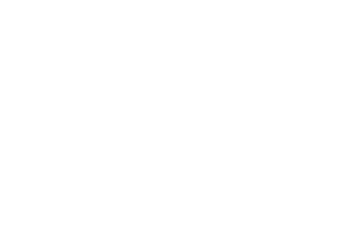

In [21]:
pos=np.linspace(0,7,7)
R,C=finaldf1.shape
#display(finaldf1)
new={}
angle=127
for j in range(1,round(R/7)+1):
    subnew={}
    subnew1={}
    '''fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)'''
    for i in range(1,C+1):
        qq=finaldf1.iloc[(j-1)*7:j*7,i-1:i].values
        #display(finaldf.iloc[:,i-1:i][:7])
        #plt.scatter(pos,qq)
        #display(len(pos),len(qq))
        F = Rbf(pos,qq,kind=typ)
        xnew=np.linspace(0,7,Num)
        G=[]
        RGB=[]
        #subnew['{}'.format(i)]=RGB
        subnew1['{}'.format(i)]=convolve(F(xnew),mean,mode=tt)
        print(convolve(F(xnew),mean,mode=tt))
    #dff=DataFrame(subnew1)
    #dff.to_csv('After_A{}_EEL={}.csv'.format(typ,xzs[j-1]))
    dfr=DataFrame(subnew)
    #display(df,len(df.columns),len(df.index))
    dy=np.linspace(0,3100,Num)
    ''' three=plt.figure(figsize=(60,60)).gca(projection='3d')
    for ll in range(0,num):
        #display(len(dff.index),len(dff.iloc[11]))
        three.scatter(dff.index,dy,dff.iloc[ll], alpha=0.8)
        three.set_xlabel('Lines',fontsize=100)
        three.set_ylabel('Columns',fontsize=100)
        three.set_zlabel('Intensity',fontsize=100)
        three.set_zticks(np.linspace(0,0.06))'''
    '''three.plot_surface(dff.index,dy,dff.values,cmap='tab20c')
    three.set_xlabel('Lines',fontsize=100)
    three.set_ylabel('Columns',fontsize=100)
    three.set_zlabel('Intensity',fontsize=100)'''
    #plt.title('EEL={}_A{}_alog{}_S_{}'.format(xzs[j-1],angle,typ,val),fontsize=100)
    #three.view_init(elev=10, azim=angle)
    '''    %time r=dfr.values.tolist()
    %time im = np.array(r, dtype=np.uint8)
    %time plt.imshow(im)'''
    #plt.savefig('EEL={}_A{}_alog{}_S_{}.png'.format(xzs[j-1],angle,typ,val),bbox_inches='tight')
    plt.axis('off')
    %time plt.savefig('AASecEEL={}.png'.format(xzs[j-1]),bbox_inches='tight',dpi=800)
    #plt.plot(xnew,f(xnew))
#df=DataFrame(new)
#display(df)
dfr.to_csv('fter_A{}_EEL={}.csv'.format(typ,xzs[j-1]))
dff.to_csv('After_A{}_EEL={}.csv'.format(typ,xzs[j-1]))

In [26]:
dff

,1,2,3,4,5,6,7,8,9,10,...,296,297,298,299,300,301,302,303,304,305
0,0.025580,0.025434,0.025207,0.024963,0.024703,0.024428,0.024139,0.023838,0.023526,0.023206,...,0.034309,0.035564,0.036339,0.036554,0.036149,0.035085,0.033348,0.030946,0.027912,0.025681
1,0.025487,0.025342,0.025116,0.024873,0.024614,0.024340,0.024054,0.023755,0.023446,0.023129,...,0.034143,0.035380,0.036144,0.036356,0.035957,0.034908,0.033195,0.030826,0.027834,0.025635
2,0.025348,0.025204,0.024979,0.024737,0.024481,0.024210,0.023926,0.023631,0.023326,0.023013,...,0.033894,0.035104,0.035852,0.036059,0.035668,0.034642,0.032965,0.030647,0.027719,0.025566
3,0.025210,0.025067,0.024843,0.024604,0.024349,0.024081,0.023801,0.023509,0.023208,0.022899,...,0.033645,0.034828,0.035559,0.035762,0.035380,0.034376,0.032736,0.030470,0.027605,0.025500
4,0.025074,0.024931,0.024709,0.024472,0.024219,0.023954,0.023677,0.023389,0.023092,0.022788,...,0.033397,0.034553,0.035267,0.035465,0.035091,0.034110,0.032508,0.030293,0.027494,0.025437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.023143,0.022929,0.022607,0.022287,0.021969,0.021656,0.021349,0.021051,0.020764,0.020489,...,0.029172,0.029316,0.029379,0.029352,0.029234,0.029023,0.028720,0.028331,0.027862,0.027524
301,0.023263,0.023062,0.022759,0.022457,0.022155,0.021857,0.021564,0.021278,0.021000,0.020732,...,0.029209,0.029367,0.029441,0.029425,0.029315,0.029110,0.028811,0.028423,0.027953,0.027613
302,0.023385,0.023196,0.022912,0.022628,0.022343,0.022060,0.021780,0.021505,0.021236,0.020975,...,0.029250,0.029421,0.029508,0.029502,0.029400,0.029200,0.028904,0.028517,0.028046,0.027705
303,0.023508,0.023332,0.023067,0.022799,0.022531,0.022262,0.021995,0.021731,0.021471,0.021217,...,0.029295,0.029480,0.029578,0.029582,0.029488,0.029293,0.029001,0.028614,0.028141,0.027798


,1,2,3,4,5,6,7,8,9,10,...,296,297,298,299,300,301,302,303,304,305
0,"[176.02186548983627, 0, 0]","[176.23031710393423, 0, 0]","[176.5605545395958, 0, 0]","[176.91163299804975, 0, 0]","[177.28259331860573, 0, 0]","[177.6797963385622, 0, 0]","[178.10390037610512, 0, 0]","[178.5560518498092, 0, 0]","[179.04291482781125, 0, 0]","[179.5702553087471, 0, 0]",...,"[182.21237812917948, 0, 0]","[182.9121532886643, 0, 0]","[183.59070605259606, 0, 0]","[184.25784882555345, 0, 0]","[184.9186781127114, 0, 0]","[185.56772595986882, 0, 0]","[186.20306516680523, 0, 0]","[186.82406251499546, 0, 0]","[187.39739493345635, 0, 0]","[187.74336987066243, 0, 0]"
1,"[174.97520000241704, 0, 0]","[175.17947894192932, 0, 0]","[175.50354257609936, 0, 0]","[175.84857726751358, 0, 0]","[176.21362886622495, 0, 0]","[176.60516687629172, 0, 0]","[177.02388457318546, 0, 0]","[177.47097360734975, 0, 0]","[177.9532262897726, 0, 0]","[178.47653130839336, 0, 0]",...,"[179.08706341809366, 0, 0]","[179.93543650200294, 0, 0]","[180.7623803837623, 0, 0]","[181.57723987147278, 0, 0]","[182.38505093704575, 0, 0]","[183.17989174200366, 0, 0]","[183.95954190529272, 0, 0]","[184.72313669089684, 0, 0]","[185.43747923529887, 0, 0]","[185.87706540730233, 0, 0]"
2,"[173.34219582068425, 0, 0]","[173.54093875048332, 0, 0]","[173.85685837412524, 0, 0]","[174.1939857676405, 0, 0]","[174.55137361284815, 0, 0]","[174.935659150132, 0, 0]","[175.34758824811732, 0, 0]","[175.78842076610755, 0, 0]","[176.2651454407364, 0, 0]","[176.78383791299348, 0, 0]",...,"[174.42840938747483, 0, 0]","[175.49410400434755, 0, 0]","[176.53808835779077, 0, 0]","[177.5690160668663, 0, 0]","[178.59183982239702, 0, 0]","[179.59996616846777, 0, 0]","[180.59074247270232, 0, 0]","[181.56296357382845, 0, 0]","[182.48363074838213, 0, 0]","[183.06020487572457, 0, 0]"
3,"[171.58560226139596, 0, 0]","[171.78026545941515, 0, 0]","[172.09028908407907, 0, 0]","[172.42183898620067, 0, 0]","[172.7739732052603, 0, 0]","[173.15350583927335, 0, 0]","[173.56123547840258, 0, 0]","[173.99849069750235, 0, 0]","[174.47246437052323, 0, 0]","[174.989424529005, 0, 0]",...,"[169.83994888773535, 0, 0]","[171.11085521419648, 0, 0]","[172.35983237559049, 0, 0]","[173.59486556734052, 0, 0]","[174.82084019253148, 0, 0]","[176.03051180648004, 0, 0]","[177.22081216005836, 0, 0]","[178.3902107224023, 0, 0]","[179.50592511430852, 0, 0]","[180.21203628871777, 0, 0]"
4,"[169.71266112573537, 0, 0]","[169.90472995949912, 0, 0]","[170.21114685000427, 0, 0]","[170.53948570469728, 0, 0]","[170.8888081337784, 0, 0]","[171.2661131684088, 0, 0]","[171.67225169641736, 0, 0]","[172.108620875624, 0, 0]","[172.5826242070553, 0, 0]","[173.10072636077447, 0, 0]",...,"[165.356075550668, 0, 0]","[166.81723677258452, 0, 0]","[168.25632353124533, 0, 0]","[169.68068235851604, 0, 0]","[171.0951501946662, 0, 0]","[172.49185880462707, 0, 0]","[173.86734569404427, 0, 0]","[175.2197740380382, 0, 0]","[176.51659761451083, 0, 0]","[177.3430342713338, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"[244.42828504393867, 0, 0]","[244.5035177588485, 0, 0]","[244.62043157096988, 0, 0]","[244.74257989871197, 0, 0]","[244.86976656000067, 0, 0]","[245.00272958446132, 0, 0]","[245.1414307767656, 0, 0]","[245.28587065578884, 0, 0]","[245.43671710482744, 0, 0]","[245.594469996257, 0, 0]",...,"[249.55176231679448, 0, 0]","[249.87439141240887, 0, 0]","[250.17532789415912, 0, 0]","[250.46906108185763, 0, 0]","[250.75587687012742, 0, 0]","[251.03538349566816, 0, 0]","[251.30745273539912, 0, 0]","[251.5720466030135, 0, 0]","[251.78514120853978, 0, 0]","[251.88234349582606, 0, 0]"
301,"[231.9255822577191, 0, 0]","[232.08888546765377, 0, 0]","[232.34288858584574, 0, 0]","[232.60872619327614, 0, 0]","[232.88607378809238, 0, 0]","[233.17665658316056, 0, 0]","[233.4805160169233, 0, 0]","[233.7977889637951, 0, 0]","[234.13007979406697, 0, 0]","[234.47863622015262, 0, 0]",...,"[245.94311085753557, 0, 0]","[246.3190983642841, 0, 0]","[246.67

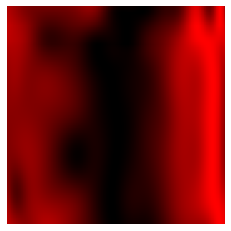

In [42]:
total={}
total1={}
for i in range(1,dff.shape[0]+1):
    sep=[]
    sep1=[]
    k=dff.iloc[i-1:i].values[0]
    ma=max(k)
    mi=min(k)
    #print(ma-mi)
    for j in k:
        values=(j-mi)/(ma-mi)
        sep1.append(values)
        sep.append([values*255,0,0])
    #print(sep[0])
    total['{}'.format(i)]=sep
    total1['{}'.format(i)]=sep1
df=DataFrame(total)
df1=DataFrame(total1)
df2=df.transpose()
r=df2.values.tolist()
im = np.array(r, dtype=np.uint8)
plt.imshow(im)
plt.axis('off')
plt.savefig('Normalize_columnwise={}.png'.format(0.135),bbox_inches='tight',dpi=800)
display(df)
df1.to_csv('Normalize_columnwise.csv')

"df=DataFrame(new)\ndisplay(df)\ndf.to_csv('ghghg.csv')"

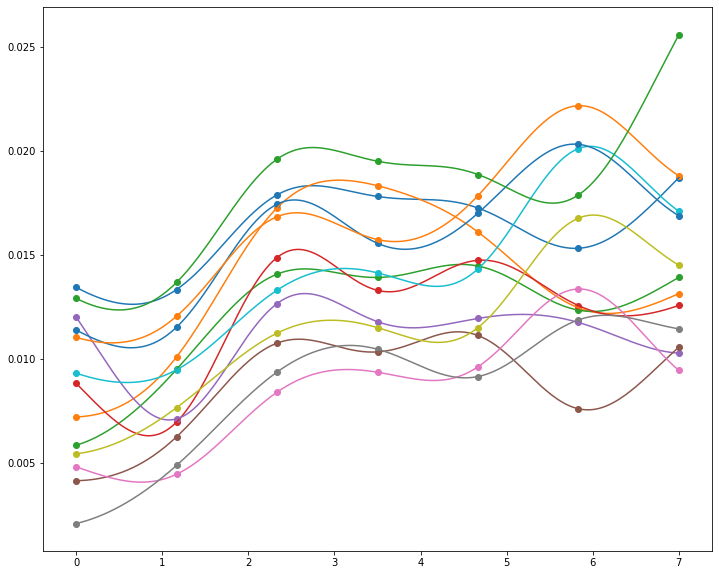

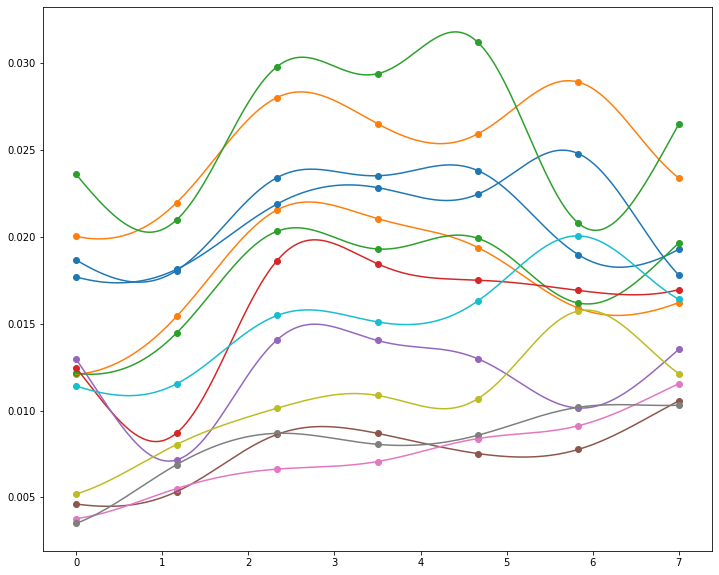

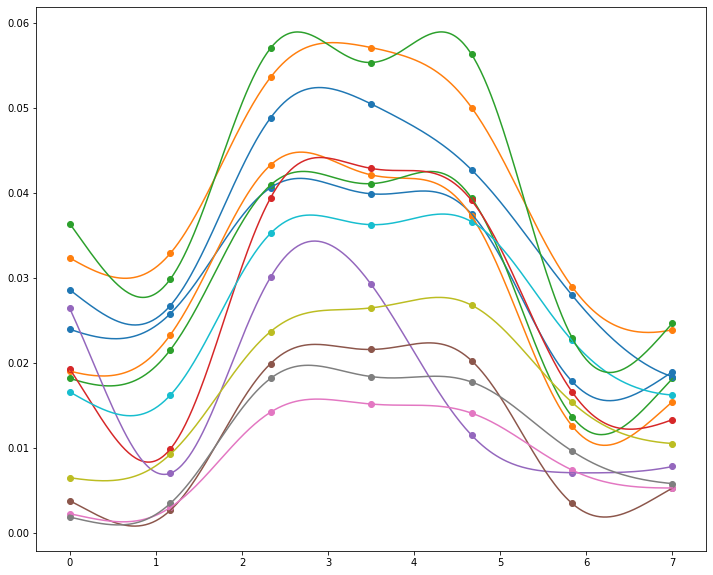

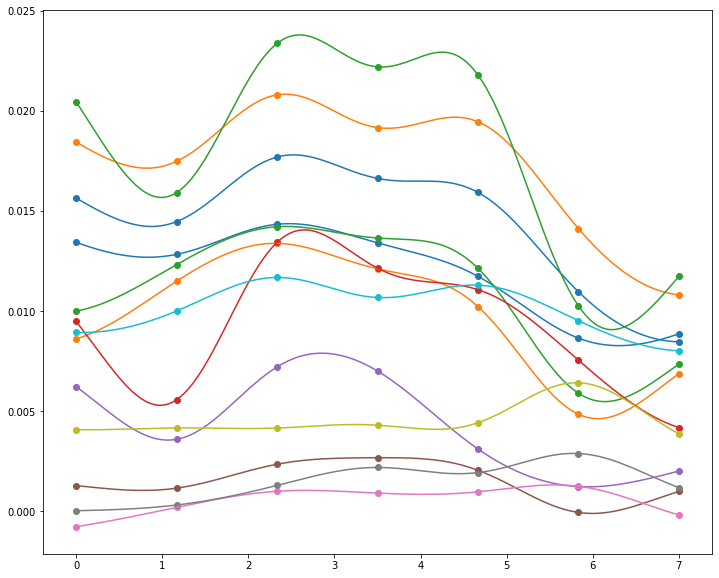

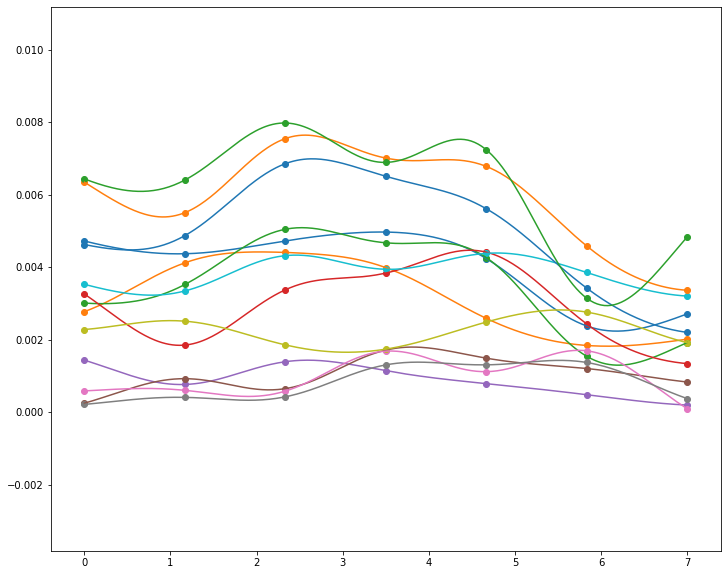

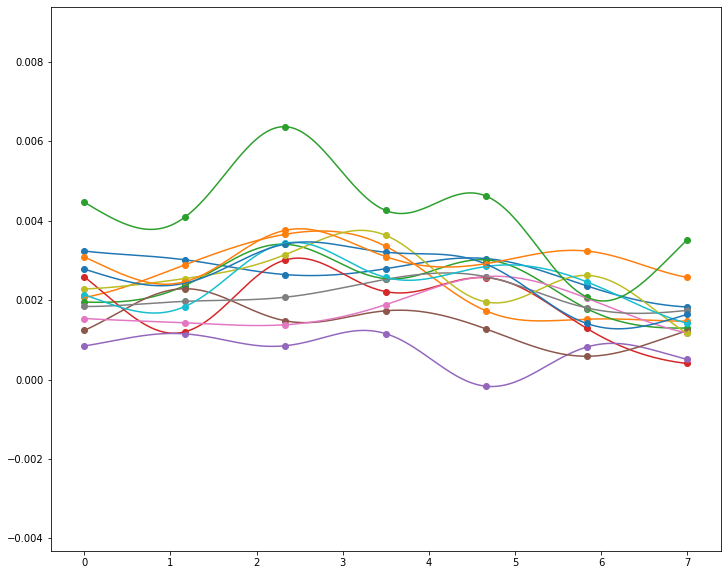

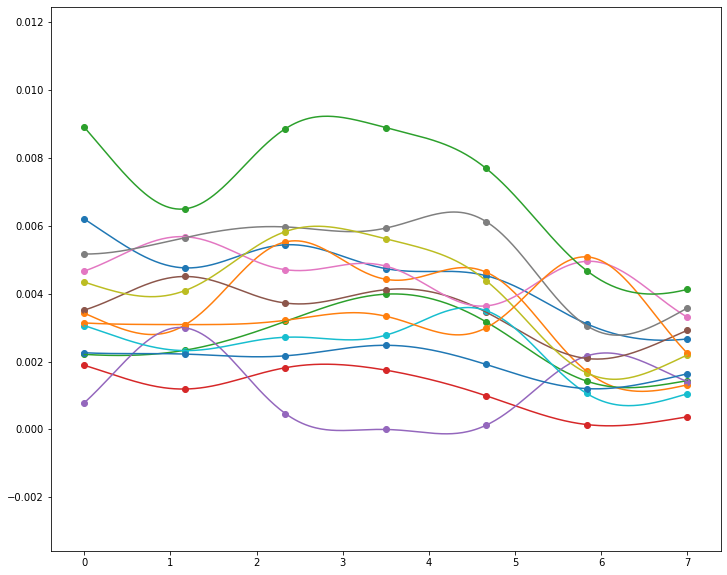

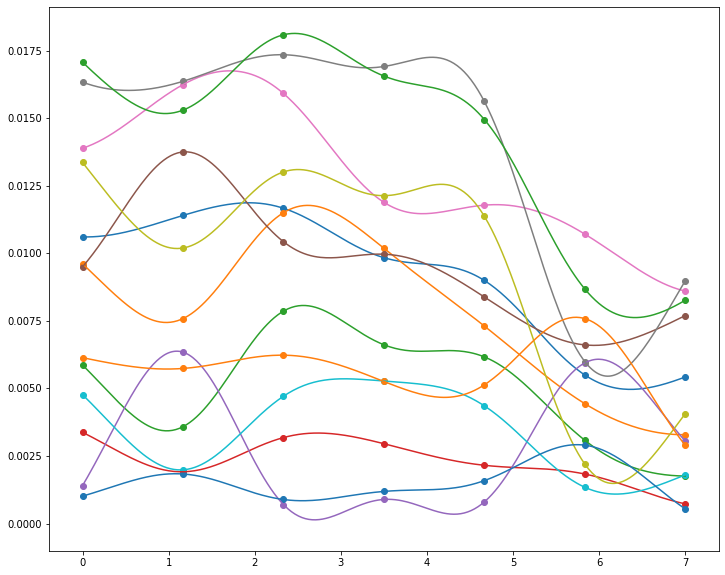

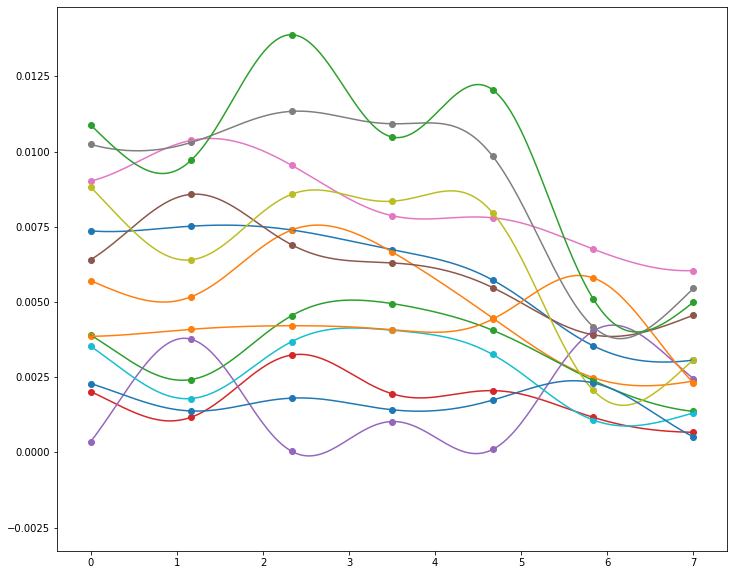

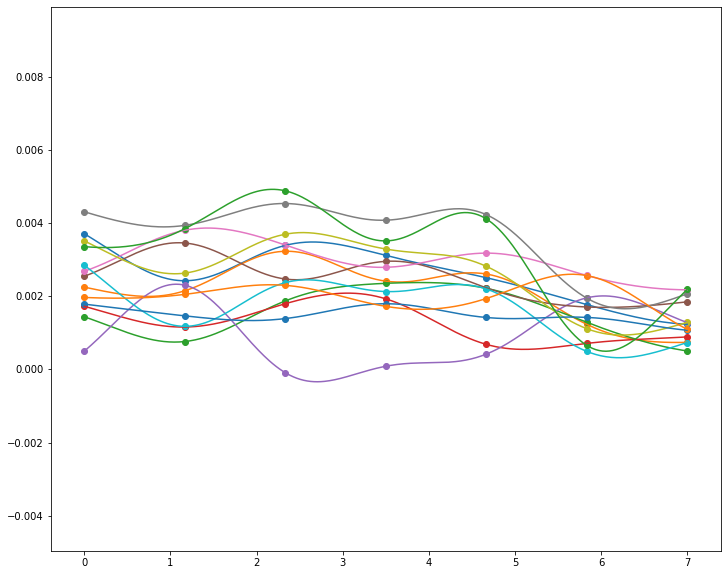

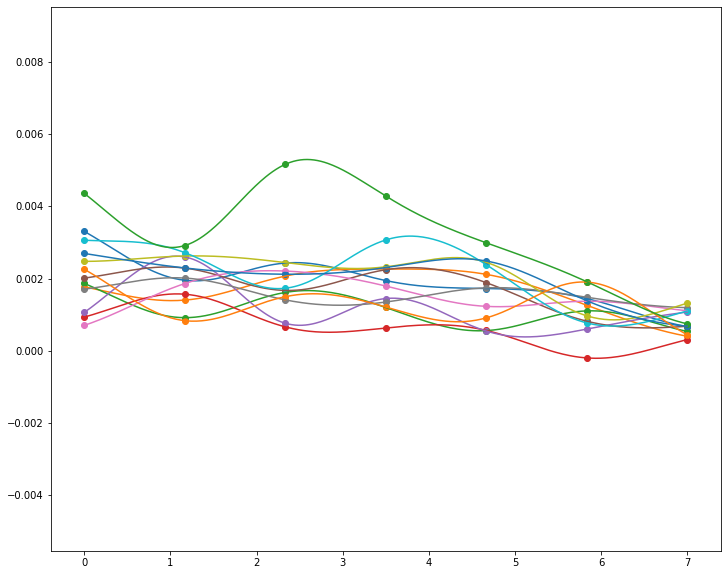

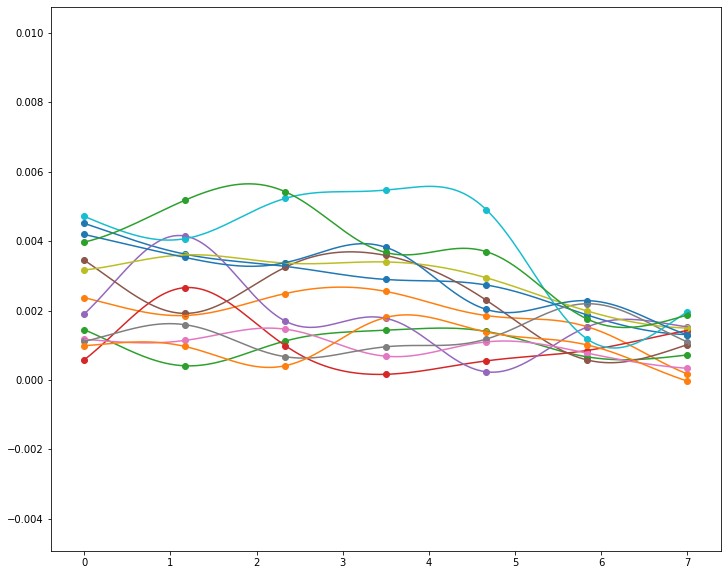

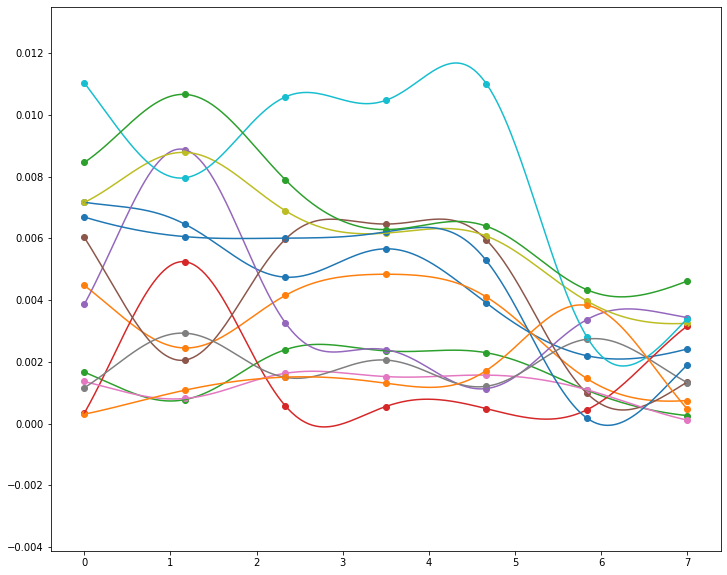

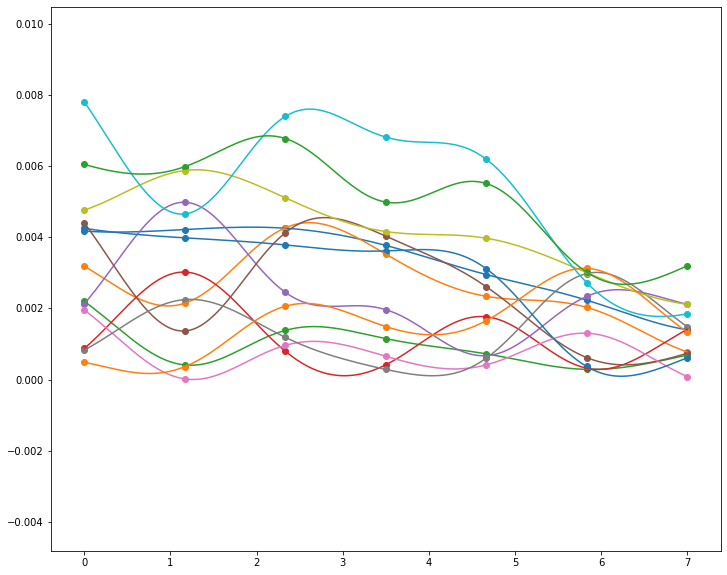

In [9]:
pos=np.linspace(0,7,7)
R,C=finaldf.shape
#display(finaldf1)
new={}
Num=350
for j in range(1,round(R/7)):
    subnew={}
    fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)
    plt.legend(['1','2','3','4','5','6','7','8','9','10','11','12','13,'])
    for i in range(1,C):
        qq=finaldf.iloc[:,i-1:i][(j-1)*7:j*7].values
        #display(finaldf.iloc[:,i-1:i][:7])
        #plt.scatter(pos,qq)
        #display(len(pos),len(qq))
        f = Rbf(pos,qq,kind=typ)
        xnew=np.linspace(0,7,Num)
        dx=np.ara
        plt.scatter(pos,qq),plt.plot(xnew,f(xnew))
        '''RGB=[]
        for number in f(xnew):
            value=(xa-number)/(xa-xi)
            RGB.append([value*255,0,0])
        subnew['{}'.format(i)]=RGB
        df=DataFrame(subnew)
    r=df.values.tolist()
    im = np.array(r, dtype=np.uint8)
    plt.imshow(im)
    plt.axis('off')
    plt.title('EEL={}'.format(xzs[j]))
    %time plt.savefig('EEL={}.png'.format(xzs[j-1]),bbox_inches='tight',dpi=800)'''
'''df=DataFrame(new)
display(df)
df.to_csv('ghghg.csv')'''

In [139]:
import cv2
import numpy as np
import glob
R,C=finaldf1.shape
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(1,round(R/7)+1):
    for filename in glob.glob('AASecEEL={}.png'.format(xzs[i-1])):
        print(xzs[i-1])
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
out = cv2.VideoWriter('AAMilestone2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

0.1
0.10526315789473685
0.1105263157894737
0.11578947368421053
0.12105263157894737
0.12631578947368421
0.13157894736842107
0.1368421052631579
0.14210526315789473
0.1473684210526316
0.15263157894736842
0.15789473684210525
0.1631578947368421
0.16842105263157897
0.17368421052631577
0.17894736842105263
0.1842105263157895
0.18947368421052632
0.19473684210526315
0.2


20

In [5]:
finaldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
EEL=0.135_line_AlA,0.025696,0.018530,0.017111,0.019474,0.020557,0.004721,0.002250,0.001510,0.007673,0.015242,0.028312,0.033187,0.036395,0.024484
EEL=0.135_line_AlB,0.024273,0.023656,0.020699,0.010031,0.008336,0.003317,0.003667,0.002913,0.009593,0.015619,0.024709,0.032100,0.030260,0.027337
EEL=0.135_line_SiO2A,0.038506,0.039734,0.036295,0.035147,0.024476,0.015059,0.011741,0.014376,0.018874,0.031449,0.044747,0.046583,0.054153,0.039107
EEL=0.135_line_SiO2B,0.039427,0.039440,0.039121,0.036537,0.026293,0.018156,0.013264,0.015127,0.022389,0.031807,0.045916,0.050781,0.057872,0.040129
EEL=0.135_line_SiO2C,0.038037,0.039014,0.042024,0.037164,0.014655,0.018095,0.013946,0.016217,0.023901,0.033822,0.044998,0.049182,0.057631,0.038850
EEL=0.135_line_SiCA,0.023509,0.016509,0.020246,0.022087,0.009835,0.005995,0.009572,0.011435,0.017942,0.025787,0.031208,0.035873,0.027780,NaN
EEL=0.135_line_SiCB,0.023714,0.019155,0.022468,0.016447,0.010723,0.006768,0.008042,0.008337,0.013016,0.019189,0.021148,0.029149,0.029599,0.027707


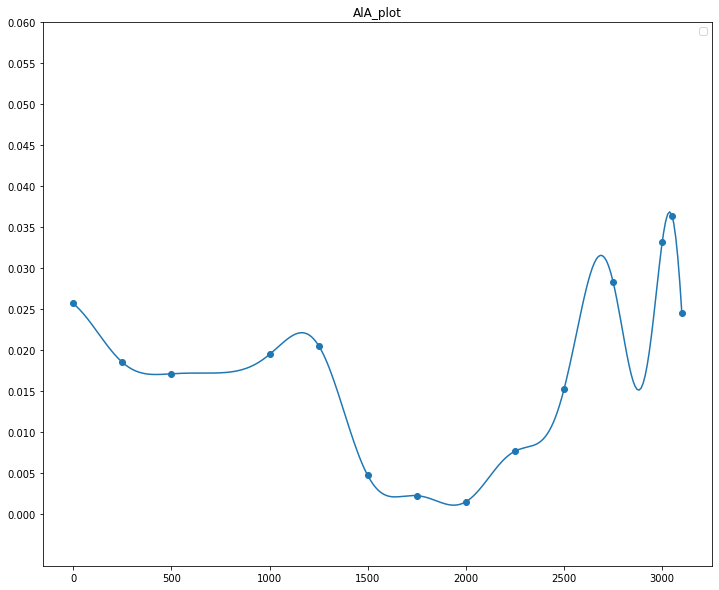

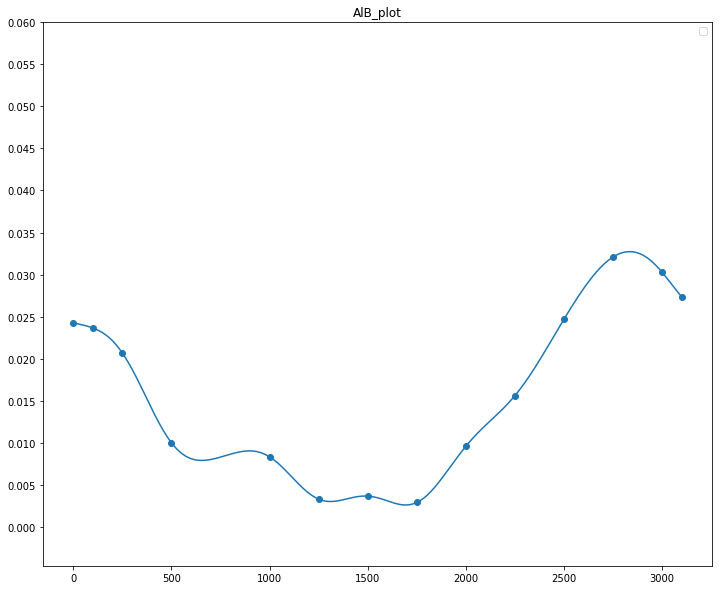

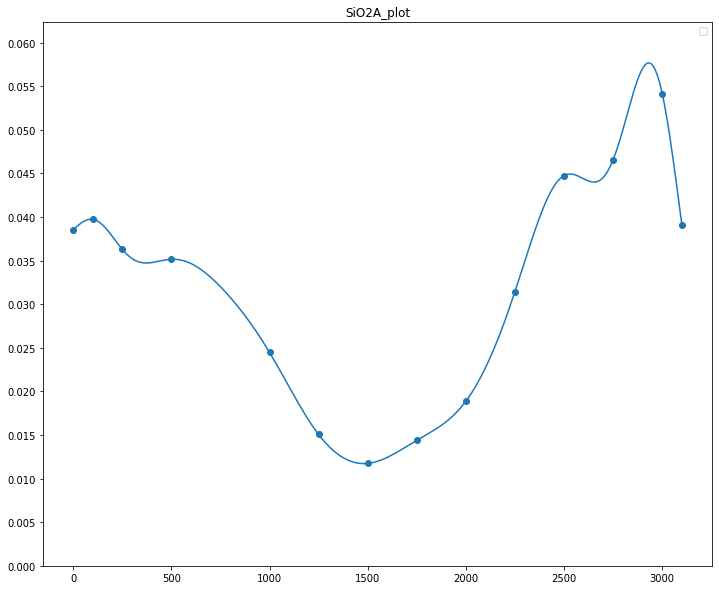

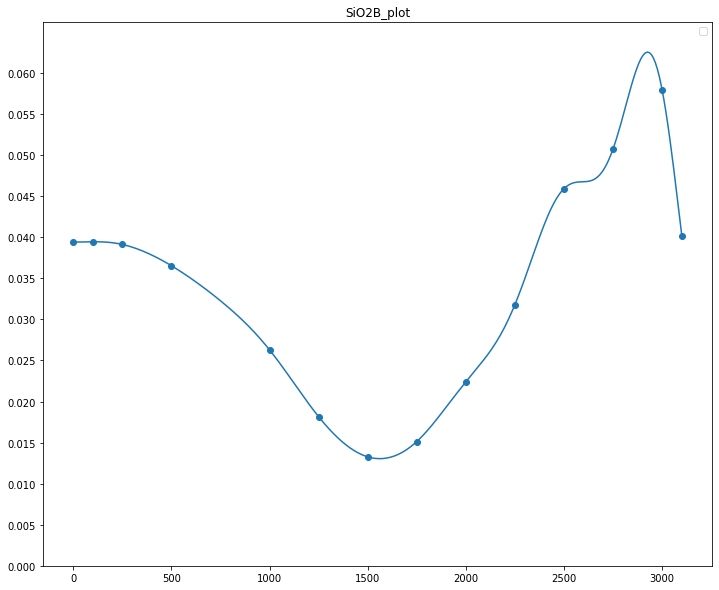

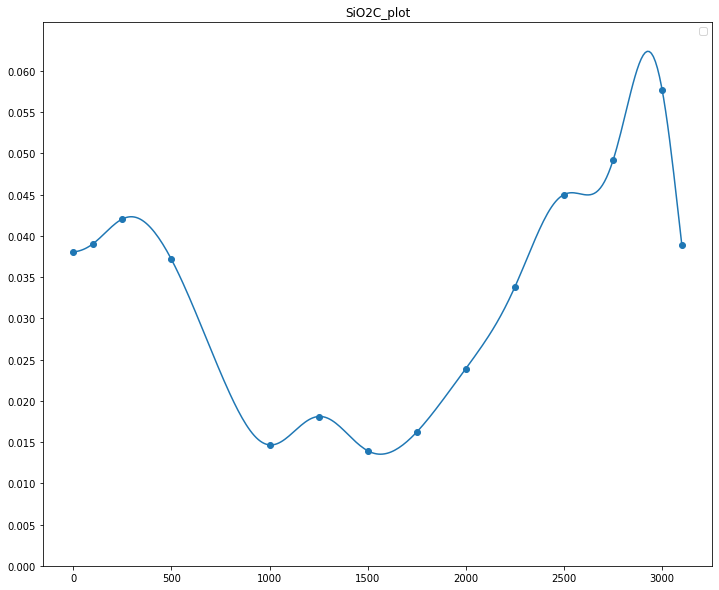

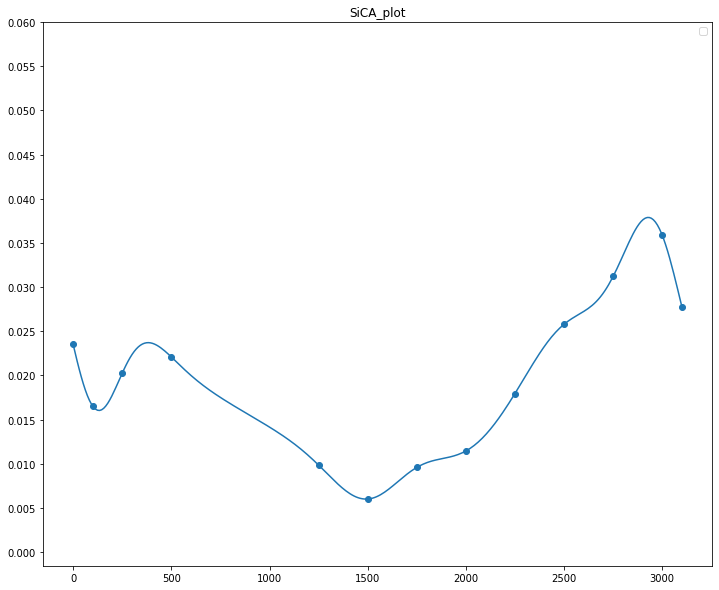

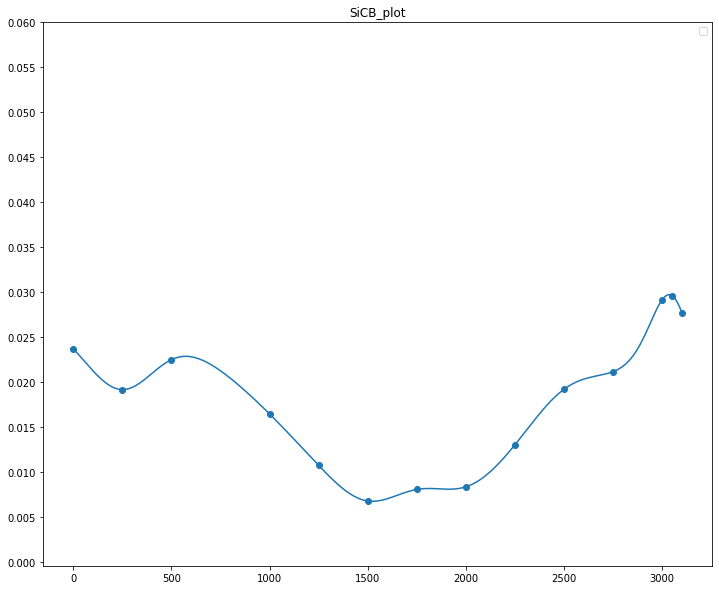

In [4]:
e,f=finaldf.shape
ttp='SiCB'
for kk in range(0,7):
    fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)
    for jj in range(1,round(e/7)+1):
        z=finaldf.iloc[(jj-1)*7+kk:(jj-1)*7+kk+1].values
        z=z[np.logical_not(np.isnan(z))]
        q=finaldf1.iloc[(jj-1)*7+kk:(jj-1)*7+kk+1].values[0]
        q=q[np.logical_not(np.isnan(q))]
        x1=np.linspace(0,3100,num)
        x=total[kk]
        #display(len(z),len(x))
        #print(type(z))
        plt.legend(['0.1', '0.135', '0.155', '0.295', '0.445', '0.5'])
        plt.scatter(x,z)
        plt.plot(x1,q)
        plt.yticks(np.arange(0,0.061,0.005))
        plt.title('{}_plot'.format(stelement[kk]))
        #print('{}_plot.png'.format(stelement[kk]))
        plt.savefig('Zqq{}_plot_{}.png'.format(stelement[kk],typ),dpi=500)

In [34]:
number=['0000','0100','0250','0500']
label=['A','B','C']
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
z=[]
for j in number:
    z.append(int(j))
display(z)
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]

[0,
 100,
 250,
 500,
 1000,
 1250,
 1500,
 1750,
 2000,
 2250,
 2500,
 2750,
 3000,
 3050,
 3100]

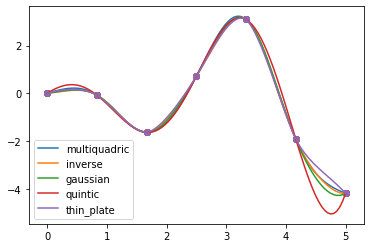

In [9]:
x=np.linspace(0,5,7)
y=[]
for i in x:
    y.append(i*np.cos(i*2))
functions =['multiquadric','inverse','gaussian','quintic','thin_plate']
for z in functions:
    f=Rbf(x,y,function=z)
    xnew=np.linspace(0,5,100)
    plt.plot(xnew,f(xnew)),plt.scatter(x,y)
    plt.legend(functions)